## Import required libraries

In [6]:
#!pip install numpy pandas tqdm seaborn matplotlib scikit-learn tensorflow 

In [5]:
import os
import librosa
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa
import librosa.display
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Model Traing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
# Model Evaluation
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models as tf_models
from sklearn.metrics import classification_report

## Mounting Dataset from Google Drive

In [7]:
dataset_root = r"C:\Users\EL-Dorado\Downloads\@Codexecution\RAVDESS"
dataset_subfolders = ["Audio_Song_Actors_01-24", "Audio_Speech_Actors_01-24"]

In [8]:
# Define emotions based on RAVDESS dataset encoding
emotion_map = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
               '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

In [9]:
# Ensuring dataset_features directory exists
output_dir = r"C:\Users\EL-Dorado\Downloads\Compressed\SpeechEmotionDetection\dataset_features"
os.makedirs(output_dir, exist_ok=True)

## Feature Extraction

In [10]:
# Function to extract features from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Extract Chroma
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

    # Extract Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)

    return np.hstack([mfccs, chroma, mel])

## Dataset Processing

In [11]:
# Function to process a dataset folder
def process_dataset(dataset_path, category, data):
    all_files = []
    for actor_folder in os.listdir(dataset_path):
        actor_path = os.path.join(dataset_path, actor_folder)
        if not os.path.isdir(actor_path):
            continue

        for file_name in os.listdir(actor_path):
            file_path = os.path.join(actor_path, file_name)
            all_files.append((file_path, file_name))

    print(f"Processing {category}: {len(all_files)} files")
    for file_path, file_name in tqdm(all_files, desc=f"{category}"):
        try:
            features = extract_features(file_path)
            emotion_code = file_name.split("-")[2]
            emotion = emotion_map.get(emotion_code, "unknown")
            data.append([file_path, category, emotion] + features.tolist())
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

In [12]:
data = []

for subfolder in dataset_subfolders:
    process_dataset(os.path.join(dataset_root, subfolder), subfolder, data)

if data:
    columns = ["file_path", "category", "emotion"] + [f"feature_{i}" for i in range(len(data[0]) - 3)]
    df = pd.DataFrame(data, columns=columns)

    #Converting Dataframe to csv
    df.to_csv(os.path.join(output_dir, "audio_features.csv"), index=False)
    print("Feature extraction completed! Data saved to dataset_features/audio_features.csv")
else:
    print("No valid audio files found for feature extraction.")


Processing Audio_Song_Actors_01-24: 1012 files


Audio_Song_Actors_01-24: 100%|██████████| 1012/1012 [01:20<00:00, 12.61it/s]


Processing Audio_Speech_Actors_01-24: 1440 files


Audio_Speech_Actors_01-24: 100%|██████████| 1440/1440 [01:05<00:00, 22.04it/s]


Feature extraction completed! Data saved to dataset_features/audio_features.csv


In [14]:
df = pd.read_csv(r"C:\Users\EL-Dorado\Downloads\Compressed\SpeechEmotionDetection\dataset_features\audio_features.csv")
df.head()

,file_path,category,emotion,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-625.106262,86.008797,-14.908678,11.612943,0.951541,9.499438,-8.360124,...,2.505913e-07,1.389767e-07,6.259342e-08,5.209959e-08,4.448409e-08,3.402783e-08,2.266297e-08,1.658761e-08,6.281665e-09,5.645767e-09
1,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-599.416138,84.052719,-15.714042,11.429276,0.850099,9.990978,-9.621907,...,2.661246e-07,1.324255e-07,8.535215e-08,4.553799e-08,3.747565e-08,3.051230e-08,2.682382e-08,1.575488e-08,1.110359e-08,1.266679e-08
2,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-612.903076,82.196556,-13.120657,14.789132,3.518427,7.586631,-6.735970,...,5.152927e-07,3.613940e-07,2.791932e-07,1.897854e-07,1.196744e-07,6.863468e-08,6.189727e-08,3.520140e-08,1.177894e-08,6.167234e-09
3,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-610.187866,83.249809,-15.969199,13.755888,1.984430,8.654107,-7.323662,...,1.089680e-06,5.147377e-07,2.775537e-07,1.649997e-07,1.496935e-07,1.194161e-07,7.391817e-08,5.389015e-08,3.181273e-08,8.312143e-09
4,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,calm,-623.877075,90.996017,-11.470400,15.081040,2.816188,12.477466,-7.909572,...,3.682214e-07,1.503961e-07,1.092785e-07,1.119673e-07,6.592948e-08,3.464470e-08,2.697515e-08,1.966369e-08,1.597177e-08,6.825751e-09


## Plot the Sample Waveform and MFCC

In [15]:
audio_file = random.choice(df['file_path'])

In [16]:
# Load audio file
y, sr = librosa.load(audio_file, sr=None)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

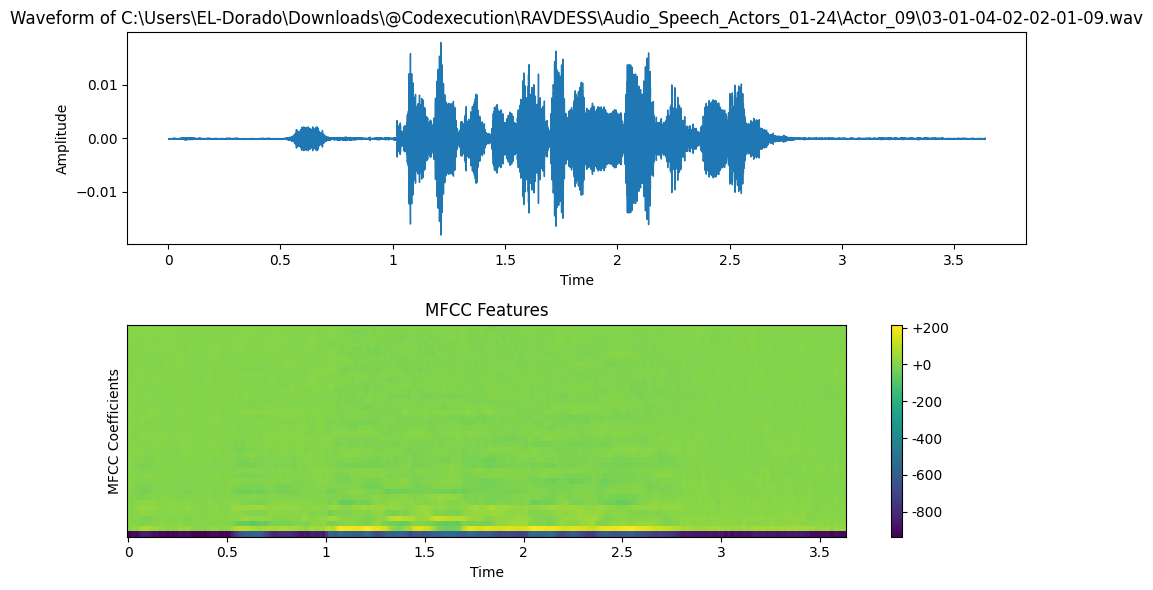

In [17]:
# Create a figure with subplots
fig, ax = plt.subplots(nrows=2, figsize=(10, 6))

# Plot waveform
ax[0].set_title(f"Waveform of {audio_file.split('/')[-1]}")
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")

# Plot MFCC features
img = librosa.display.specshow(mfccs, x_axis="time", sr=sr, ax=ax[1], cmap="viridis")
ax[1].set_title("MFCC Features")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("MFCC Coefficients")
fig.colorbar(img, ax=ax[1], format="%+2.f")
# Show plot
plt.tight_layout()
plt.show()

## Preporcessing Dataset

In [18]:
df.head()

,file_path,category,emotion,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-625.106262,86.008797,-14.908678,11.612943,0.951541,9.499438,-8.360124,...,2.505913e-07,1.389767e-07,6.259342e-08,5.209959e-08,4.448409e-08,3.402783e-08,2.266297e-08,1.658761e-08,6.281665e-09,5.645767e-09
1,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-599.416138,84.052719,-15.714042,11.429276,0.850099,9.990978,-9.621907,...,2.661246e-07,1.324255e-07,8.535215e-08,4.553799e-08,3.747565e-08,3.051230e-08,2.682382e-08,1.575488e-08,1.110359e-08,1.266679e-08
2,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-612.903076,82.196556,-13.120657,14.789132,3.518427,7.586631,-6.735970,...,5.152927e-07,3.613940e-07,2.791932e-07,1.897854e-07,1.196744e-07,6.863468e-08,6.189727e-08,3.520140e-08,1.177894e-08,6.167234e-09
3,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,neutral,-610.187866,83.249809,-15.969199,13.755888,1.984430,8.654107,-7.323662,...,1.089680e-06,5.147377e-07,2.775537e-07,1.649997e-07,1.496935e-07,1.194161e-07,7.391817e-08,5.389015e-08,3.181273e-08,8.312143e-09
4,C:\Users\EL-Dorado\Downloads\@Codexecution\RAV...,Audio_Song_Actors_01-24,calm,-623.877075,90.996017,-11.470400,15.081040,2.816188,12.477466,-7.909572,...,3.682214e-07,1.503961e-07,1.092785e-07,1.119673e-07,6.592948e-08,3.464470e-08,2.697515e-08,1.966369e-08,1.597177e-08,6.825751e-09


In [19]:
# Encode emotions
print(df['emotion'])
label_encoder = LabelEncoder()
df["emotion"] = label_encoder.fit_transform(df["emotion"])
df['emotion']

0         neutral
1         neutral
2         neutral
3         neutral
4            calm
          ...    
2447    surprised
2448    surprised
2449    surprised
2450    surprised
2451    surprised
Name: emotion, Length: 2452, dtype: object


0       5
1       5
2       5
3       5
4       1
       ..
2447    7
2448    7
2449    7
2450    7
2451    7
Name: emotion, Length: 2452, dtype: int64

In [20]:
df['emotion'].value_counts()

emotion
1    376
4    376
6    376
0    376
3    376
2    192
7    192
5    188
Name: count, dtype: int64

In [21]:
# Excluding non-feature columns
exclude_columns = ["emotion", "file_path", "category"]

# Split data into features and labels
X = df.drop(columns=exclude_columns, axis=1)
y = df["emotion"]

In [22]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1716, 180), (736, 180), (1716,), (736,))

In [24]:
np.save(os.path.join(output_dir, "X_train.npy"), X_train)
np.save(os.path.join(output_dir, "X_test.npy"), X_test)
np.save(os.path.join(output_dir, "y_train.npy"), y_train)
np.save(os.path.join(output_dir, "y_test.npy"), y_test)

print("Data preprocessing completed! Datasets saved in dataset_features/")

Data preprocessing completed! Datasets saved in dataset_features/


## Model Training

In [27]:
# Load dataset
dataset_dir = r"C:\Users\EL-Dorado\Downloads\Compressed\SpeechEmotionDetection\dataset_features"
X_train = np.load(os.path.join(dataset_dir, "X_train.npy"))
X_test = np.load(os.path.join(dataset_dir, "X_test.npy"))
y_train = np.load(os.path.join(dataset_dir, "y_train.npy"))
y_test = np.load(os.path.join(dataset_dir, "y_test.npy"))

In [28]:
# Define CNN Model
model = Sequential([
    Conv1D(64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(128, kernel_size=3, activation="relu"),
    MaxPooling1D(2),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation="softmax")
])

c:\Users\EL-Dorado\Downloads\Compressed\SpeechEmotionDetection\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 178, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5504)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,409,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,436,296 (5.48 MB)

 Trainable params: 1,436,296 (5.48 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9682 - loss: 0.1025 - val_accuracy: 0.7228 - val_loss: 1.0159
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9841 - loss: 0.0828 - val_accuracy: 0.7310 - val_loss: 0.9704
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9679 - loss: 0.0819 - val_accuracy: 0.7147 - val_loss: 0.9956
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9887 - loss: 0.0573 - val_accuracy: 0.7269 - val_loss: 1.0523
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9721 - loss: 0.0696 - val_accuracy: 0.7120 - val_loss: 1.0236
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9809 - loss: 0.0667 - val_accuracy: 0.7378 - val_loss: 1.0250
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9726 - loss: 0.0828 - val_accuracy: 0.7459 - val_loss: 1.0629
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9824 - loss: 0.0647 - val_accuracy: 0.7255 - v

In [32]:
# Save Model
model.save("speech_emotion_model.h5")
print("Model trained and saved!")

Model trained and saved!


## Model Evaluation

In [33]:
# Reshape input
X_test = np.expand_dims(X_test, axis=2)

In [34]:
# Load Saved model
model = tf_models.load_model("speech_emotion_model.h5")

In [35]:
# Predict Output
y_pred = np.argmax(model.predict(X_test), axis=1)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [36]:
# Evaluate Print
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       115
           1       0.78      0.85      0.82       107
           2       0.70      0.79      0.74        58
           3       0.66      0.67      0.66        99
           4       0.77      0.77      0.77       124
           5       0.65      0.80      0.72        69
           6       0.75      0.61      0.67       109
           7       0.76      0.58      0.66        55

    accuracy                           0.74       736
   macro avg       0.73      0.73      0.73       736
weighted avg       0.74      0.74      0.74       736



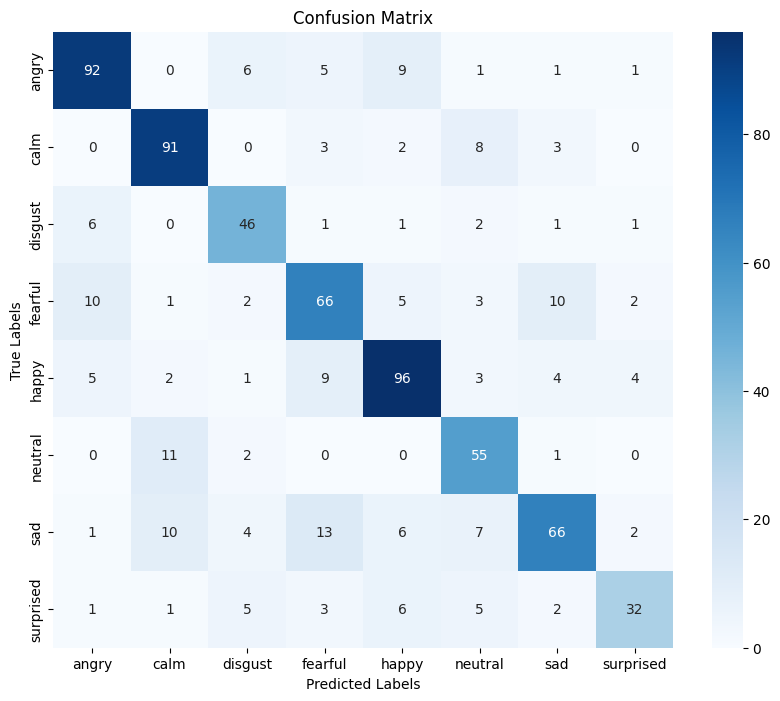

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()